In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [3]:
dataset_path = '../dataset/'

In [4]:
info_data = pd.read_csv(dataset_path + 'Monkeypox_Dataset_metadata.csv')

In [5]:
info_data.head()

,ImageID,Label
0,M01_01,Monkeypox
1,M01_02,Monkeypox
2,M01_03,Monkeypox
3,M01_04,Monkeypox
4,M02_01,Monkeypox


In [6]:
info_data['Label'].nunique()

2

In [7]:
info_data.shape

(228, 2)

In [8]:
def ImageAddress(x):
    if(x[0] == 'M'):
        return dataset_path + 'Original Images/Monkey Pox/' + x + '.jpg'
    else:
        return dataset_path + 'Original Images/Others/' + x + '.jpg'


In [9]:
info_data['path'] = info_data['ImageID'].apply(ImageAddress)

In [10]:
info_data.head()

,ImageID,Label,path
0,M01_01,Monkeypox,drive/MyDrive/dataset/Original Images/Monkey P...
1,M01_02,Monkeypox,drive/MyDrive/dataset/Original Images/Monkey P...
2,M01_03,Monkeypox,drive/MyDrive/dataset/Original Images/Monkey P...
3,M01_04,Monkeypox,drive/MyDrive/dataset/Original Images/Monkey P...
4,M02_01,Monkeypox,drive/MyDrive/dataset/Original Images/Monkey P...


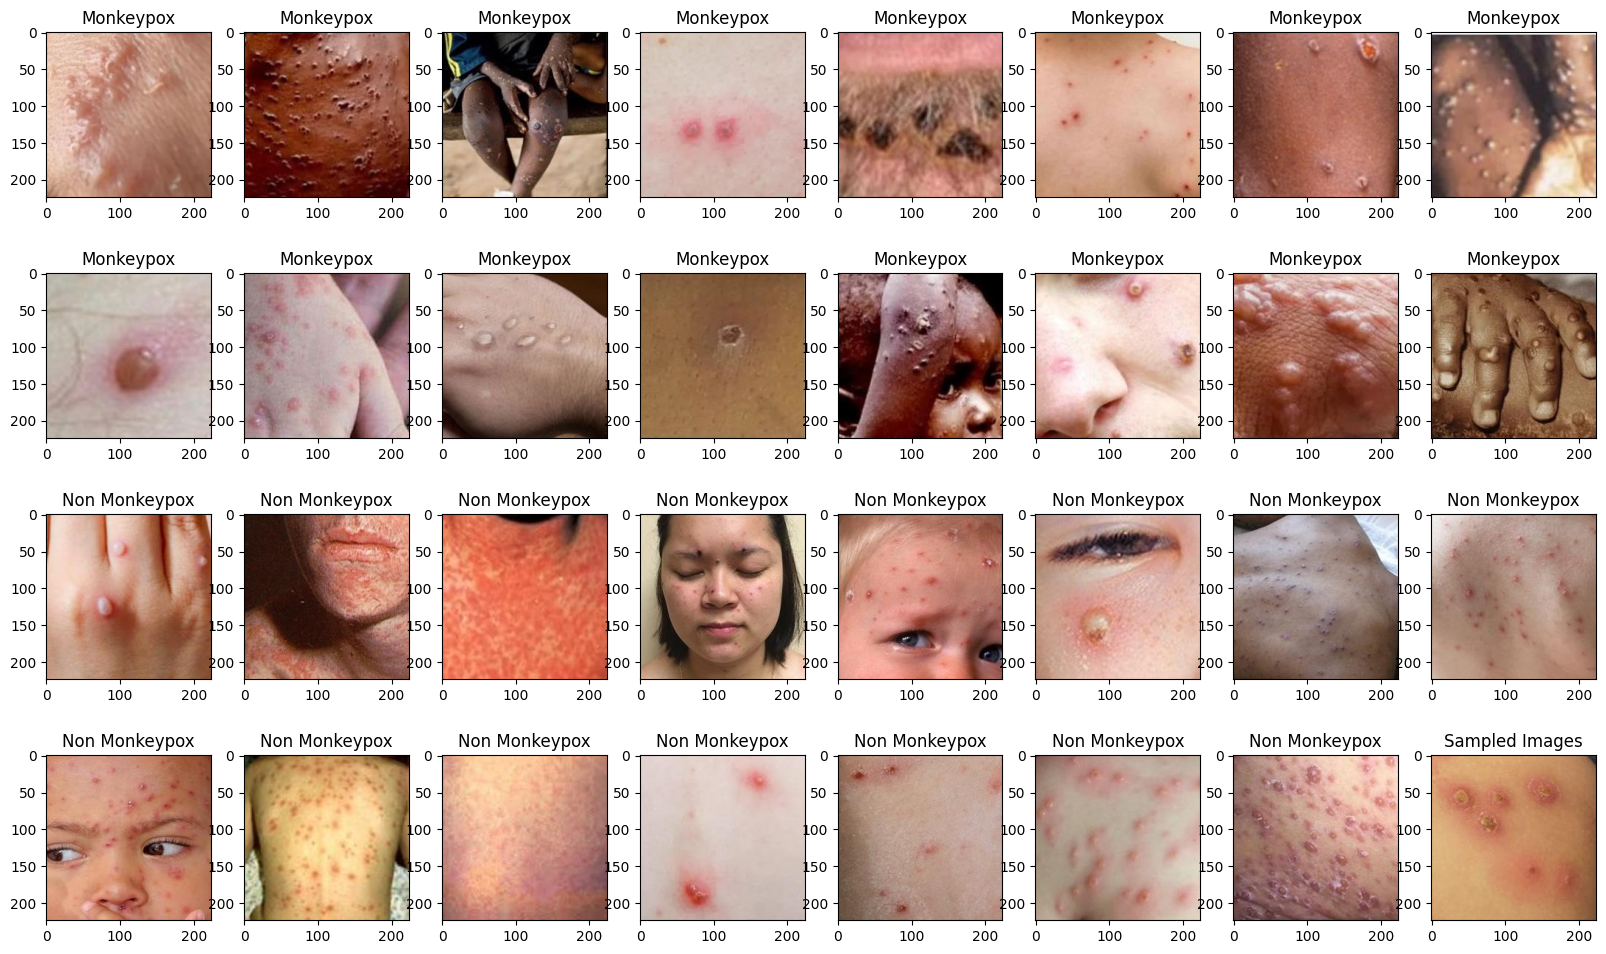

In [11]:
fig, ax = plt.subplots(4, 8, figsize=(20, 12))

monkeypox_data = info_data[info_data['Label'] == 'Monkeypox']
non_monkeypox_data = info_data[info_data['Label'] != 'Monkeypox']

monkeypox_sample = monkeypox_data.sample(n=16, ignore_index = True)
non_monkeypox_sample = non_monkeypox_data.sample(n=16, ignore_index = True)

# Concatenate the two samples into a single DataFrame for display
random_data = pd.concat([monkeypox_sample, non_monkeypox_sample], ignore_index = True)



k = 0
for i in range(4):
    for j in range(8):
            ax[i][j].set_title(random_data['Label'][k])
            ax[i][j].imshow(plt.imread(random_data['path'][k]))
            k+=1

plt.title("Sampled Images")
plt.show()



### Data Augemnetation and Splitting

In [26]:
# !pip install split-folders

# import splitfolders # or import splitfolders
# input_folder = dataset_path + "Original Images"
# output = dataset_path + "Split" #where you want the split datasets saved. one will be created if it does not exist or none is set

# splitfolders.ratio(input_folder, output=output, seed=45, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 228 files [00:03, 70.58 files/s] 


In [24]:
# from keras.preprocessing import image_dataset_from_directory



# training_df = image_dataset_from_directory(
#     dataset_path + "Original Images",
#     batch_size = 10,
#     image_size = (300,300),

#     shuffle = True,
#     seed = 45,
#     validation_split = 0.15,
#     subset = 'training'
# )

# testing_df = image_dataset_from_directory(
#     dataset_path + "Original Images",
#     batch_size = 10,
#     image_size = (300,300),

#     shuffle = True,
#     seed = 45,
#     validation_split = 0.1,
#     subset = 'validation'
# )

Found 228 files belonging to 2 classes.
Using 194 files for training.
Found 228 files belonging to 2 classes.
Using 22 files for validation.


In [33]:
# # Set up parameters for data augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1. /255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )


# val_datagen = ImageDataGenerator(
#     rescale=1. /255
# )

# train_generator = train_datagen.flow_from_directory(
#     dataset_path + "Split/train",
#     seed = 42,
#     target_size=(300, 300),
#     shuffle = True,
#     batch_size=10,
#     class_mode='categorical'
# )

# validation_generator = val_datagen.flow_from_directory(
#     dataset_path + "Split/val",
#     target_size=(300, 300),
#     seed = 42,
#     shuffle = True,
#     batch_size=10,
#     class_mode='categorical'
# )

# test_generator = val_datagen.flow_from_directory(
#     dataset_path + "Split/test",
#     target_size=(300, 300),
#     seed = 42,
#     shuffle = True,
#     class_mode='categorical'
# )

Found 181 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [49]:
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255,validation_split=0.4)

# Loading Data
train_data = train_gen.flow_from_directory(
    dataset_path + "Augmented Images",
    target_size=(256,256),
    shuffle=True,
    class_mode='binary'
)

valid_data = valid_gen.flow_from_directory(
    dataset_path + "Original Images",
    target_size=(256,256),
    shuffle=True,
    subset='training',
    class_mode='binary'
)

test_data = valid_gen.flow_from_directory(
    dataset_path + 'Original Images',
    target_size=(256,256),
    shuffle=True,
    subset='validation',
    class_mode='binary'
)

Found 3191 images belonging to 2 classes.
Found 138 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [48]:
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.models import Sequential
# # from tensorflow.keras.optimizers import Adam
# #from tensorflow.keras.optimizers.legacy import Adam #for mac
# from tensorflow.keras.applications import ResNet50


# model = Sequential()


# pretrained_model= ResNet50(include_top=False,
#                            input_shape=(300, 300, 3),
#                            pooling='avg',
#                            classes=2,
#                            weights='imagenet')

# # Disable train on ResNet50
# for layer in pretrained_model.layers:
#     layer.trainable=False

# # ResNet50 Layers
# model.add(pretrained_model)
# # Flatten all data
# model.add(Flatten())
# # Fully connected layers with 512 neurons
# model.add(Dense(512, activation='relu'))
# # Output layers
# model.add(Dense(2, activation='softmax'))

# # Give summary
# model.summary()



In [35]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
# model.fit(train_generator, validation_data = validation_generator, epochs = 35)

Epoch 1/35
19/19 [==============================] - 10s 295ms/step - loss: 1.2060 - accuracy: 0.4641 - val_loss: 1.0175 - val_accuracy: 0.5455
Epoch 2/35
19/19 [==============================] - 5s 254ms/step - loss: 0.7210 - accuracy: 0.5414 - val_loss: 0.6766 - val_accuracy: 0.6364
Epoch 3/35
19/19 [==============================] - 6s 314ms/step - loss: 0.7030 - accuracy: 0.5746 - val_loss: 0.8164 - val_accuracy: 0.5455
Epoch 4/35
19/19 [==============================] - 5s 245ms/step - loss: 0.8250 - accuracy: 0.4917 - val_loss: 0.6633 - val_accuracy: 0.6818
Epoch 5/35
19/19 [==============================] - 5s 286ms/step - loss: 0.7995 - accuracy: 0.5359 - val_loss: 0.6861 - val_accuracy: 0.5455
Epoch 6/35
19/19 [==============================] - 5s 271ms/step - loss: 0.7328 - accuracy: 0.5525 - val_loss: 0.7333 - val_accuracy: 0.5455
Epoch 7/35
19/19 [==============================] - 5s 238ms/step - loss: 0.8900 - accuracy: 0.5359 - val_loss: 0.9038 - val_accuracy: 0.4545
Epoch

In [50]:
#NEW MODELfrom keras.models import Sequential

from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(
    include_top=False,
    input_shape=(256,256,3)
)
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(164,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

model.summary()

94668760/94668760 [==============================] - 5s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 164)               42148     
                                                       

In [53]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

cb = [EarlyStopping(patience=5,monitor='val_accuracy',mode='max',restore_best_weights=True),ModelCheckpoint("ResNet50V2-01.h5",save_best_only=True)]

model.fit(
    train_data,
    epochs= 25,
    validation_data=valid_data,
    callbacks=cb
)

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.1381 - accuracy: 0.9433

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 448s 5s/step - loss: 0.1381 - accuracy: 0.9433 - val_loss: 0.0340 - val_accuracy: 0.9928
Epoch 2/25
100/100 [==============================] - 13s 131ms/step - loss: 0.0885 - accuracy: 0.9677 - val_loss: 0.0181 - val_accuracy: 0.9928
Epoch 3/25
100/100 [==============================] - 13s 131ms/step - loss: 0.0658 - accuracy: 0.9762 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4/25
100/100 [==============================] - 13s 130ms/step - loss: 0.0475 - accuracy: 0.9840 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 5/25
100/100 [==============================] - 14s 140ms/step - loss: 0.0485 - accuracy: 0.9837 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 6/25
100/100 [==============================] - 16s 164ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/25
100/100 [==============================] - 13s 131ms/step - loss: 0.0353 - accuracy: 0.9878 - val_loss: 0.0013 - val_accuracy: 1.000

In [54]:
model.save('poxvisio_model.h5')

In [56]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

img = load_img('trail.png')
img = img.resize((256,256))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
a = np.argmax(model.predict(x),axis=1)
class_names = ['MonkeyPox','Other' ]
y_pred = model.predict(x)
class_idx = np.argmax(y_pred,axis=1)[0]
class_name =class_names[class_idx]
print('Predicted Class name:',class_name)

1/1 [==============================] - 0s 27ms/step
Predicted Class name: MonkeyPox
